In [4]:
%matplotlib notebook

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [6]:
artistdf = pd.read_csv("Resources/Artistfile.csv")
artistdf.head()

,Artist Name,Artist ID,Artist_Popularity,Artist_Followers,Artist Genre,Main Genre
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,90.0,16410055.0,"beatlesque,british invasion,classic rock,merse...",beatlesque
1,The Rolling Stones,22bE4uQ6baNwSHPVcDxLCe,84.0,8678847.0,"album rock,british invasion,classic rock,rock",album rock
2,Bob Dylan,74ASZWbe4lXaubB36ztrGX,79.0,4220152.0,"album rock,classic rock,country rock,folk,folk...",album rock
3,David Bowie,0oSGxfWSnnOXhD2fKuz2Gy,82.0,5524310.0,"album rock,art rock,classic rock,dance rock,gl...",album rock
4,Led Zeppelin,36QJpDe2go2KgaRleHCDTp,82.0,9060576.0,"album rock,classic rock,hard rock,rock",album rock


In [7]:
trackdf = pd.read_csv("Resources/Trackfile.csv")
trackdf.head()

,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,1969-09-26,185733,83,0.557,0.540,9.0,-10.484,1.0,0.0347,0.0339,0.002480,0.1790,0.394,129.171
1,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Come Together - Remastered 2009,2EqlS6tkEnglzr7tkKAAYD,1969-09-26,259946,78,0.533,0.376,9.0,-11.913,0.0,0.0393,0.0302,0.248000,0.0926,0.187,165.007
2,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Let It Be - Remastered 2009,7iN1s7xHE4ifF5povM6A48,1970-05-08,243026,78,0.443,0.403,0.0,-8.339,1.0,0.0322,0.6310,0.000000,0.1110,0.410,143.462
3,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,77,0.332,0.179,5.0,-11.830,1.0,0.0326,0.8790,0.000000,0.0886,0.315,96.529
4,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,2000-11-13,425653,76,0.386,0.607,10.0,-7.700,1.0,0.0261,0.0112,0.000014,0.0880,0.532,147.207


In [8]:
# Adding a column of just the release year
dates = trackdf["Release Date"]
trackdf["Release Year"] = dates.apply(lambda x: int(x.split("-",1)[0]))
trackdf.head()


,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Release Year
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,1969-09-26,185733,83,0.557,0.540,9.0,-10.484,1.0,0.0347,0.0339,0.002480,0.1790,0.394,129.171,1969
1,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Come Together - Remastered 2009,2EqlS6tkEnglzr7tkKAAYD,1969-09-26,259946,78,0.533,0.376,9.0,-11.913,0.0,0.0393,0.0302,0.248000,0.0926,0.187,165.007,1969
2,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Let It Be - Remastered 2009,7iN1s7xHE4ifF5povM6A48,1970-05-08,243026,78,0.443,0.403,0.0,-8.339,1.0,0.0322,0.6310,0.000000,0.1110,0.410,143.462,1970
3,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,77,0.332,0.179,5.0,-11.830,1.0,0.0326,0.8790,0.000000,0.0886,0.315,96.529,1965
4,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,2000-11-13,425653,76,0.386,0.607,10.0,-7.700,1.0,0.0261,0.0112,0.000014,0.0880,0.532,147.207,2000


In [9]:
plt.style.use("bmh")
sns.set(style="darkgrid")

<IPython.core.display.Javascript object>


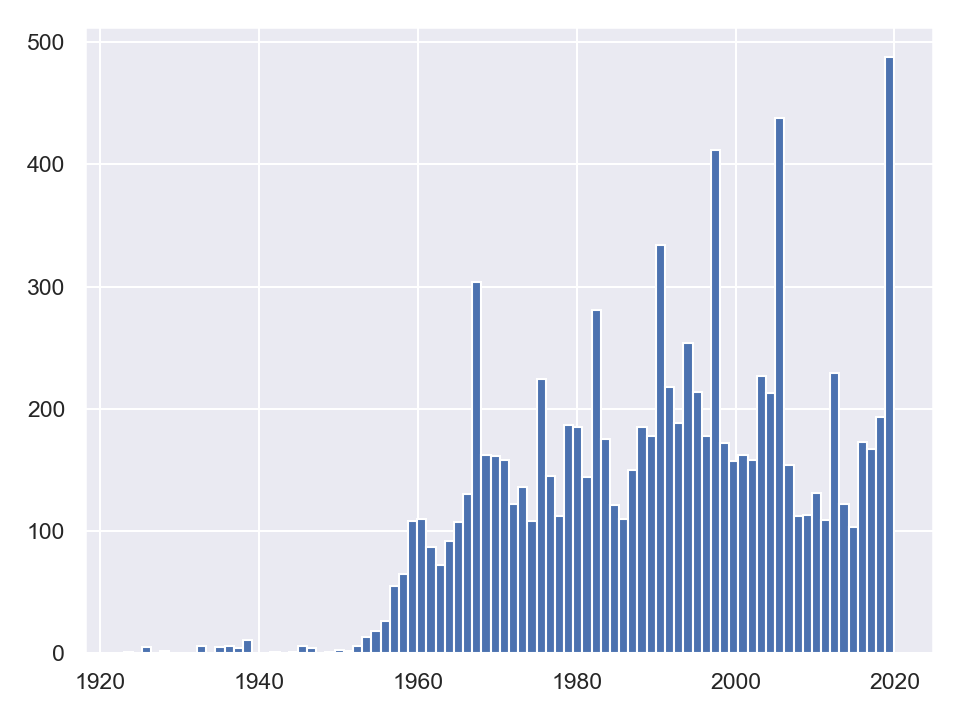

In [10]:

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.hist(trackdf["Release Year"], bins=len(trackdf["Release Year"].unique()))
plt.show()


<IPython.core.display.Javascript object>


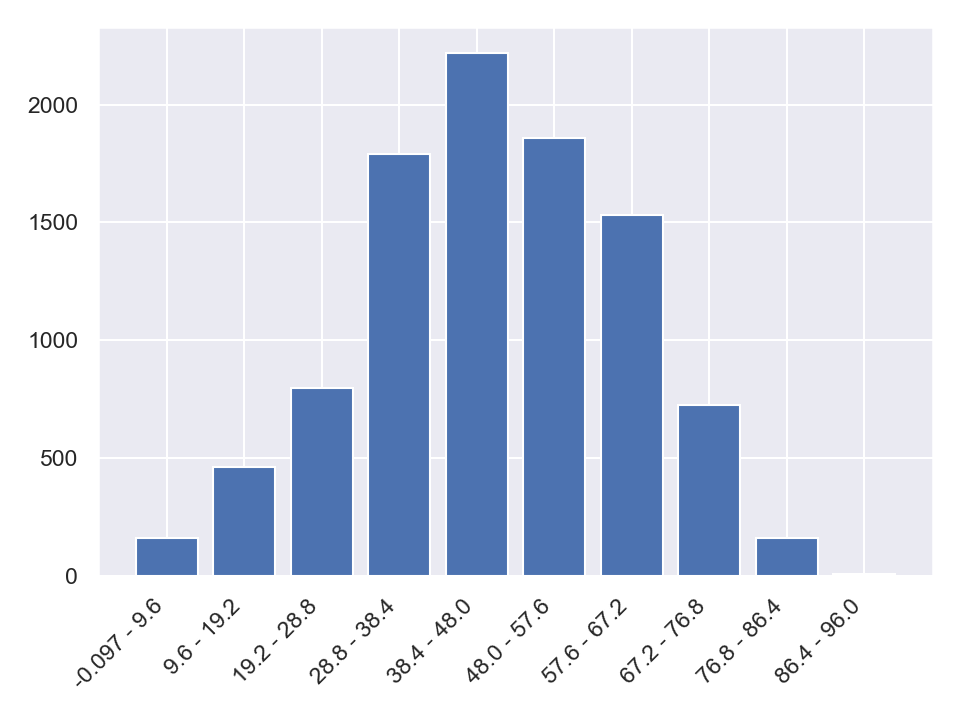

In [11]:
#popcats = pd.qcut(trackdf["Popularity"], 4)
popbins = trackdf["Popularity"].value_counts(bins=10, ascending=True, sort=False)
popb_names = [f"{x.left} - {x.right}" for x in popbins.index]
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.bar(popb_names, popbins)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")


plt.show()

In [26]:
releasedf = trackdf.loc[trackdf["Release Year"] > 1949]
releasedf = releasedf.groupby("Release Year").mean()
releasedf = releasedf.rolling(5).mean().dropna()
releasedf.head()

,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Release Year,,,,,,,,,,,,,
1955,212718.421368,39.683761,0.564365,0.373557,5.611966,-12.022490,0.782906,0.059349,0.739140,0.168862,0.165519,0.570630,114.412975
1956,218360.249573,42.047863,0.538860,0.359414,5.604274,-13.108354,0.713675,0.066974,0.733286,0.190277,0.163314,0.517038,105.345309
1957,230158.011391,41.620591,0.532178,0.400985,5.017001,-12.939174,0.651857,0.074665,0.726437,0.149482,0.173207,0.575776,107.943470
1958,235435.806263,43.243667,0.540134,0.357661,4.948283,-13.223825,0.653908,0.072079,0.739593,0.134156,0.158965,0.541518,115.737161
1959,220262.642303,43.535833,0.553195,0.372386,4.956687,-12.887481,0.672854,0.074410,0.723825,0.113631,0.166540,0.551433,115.077138


<IPython.core.display.Javascript object>


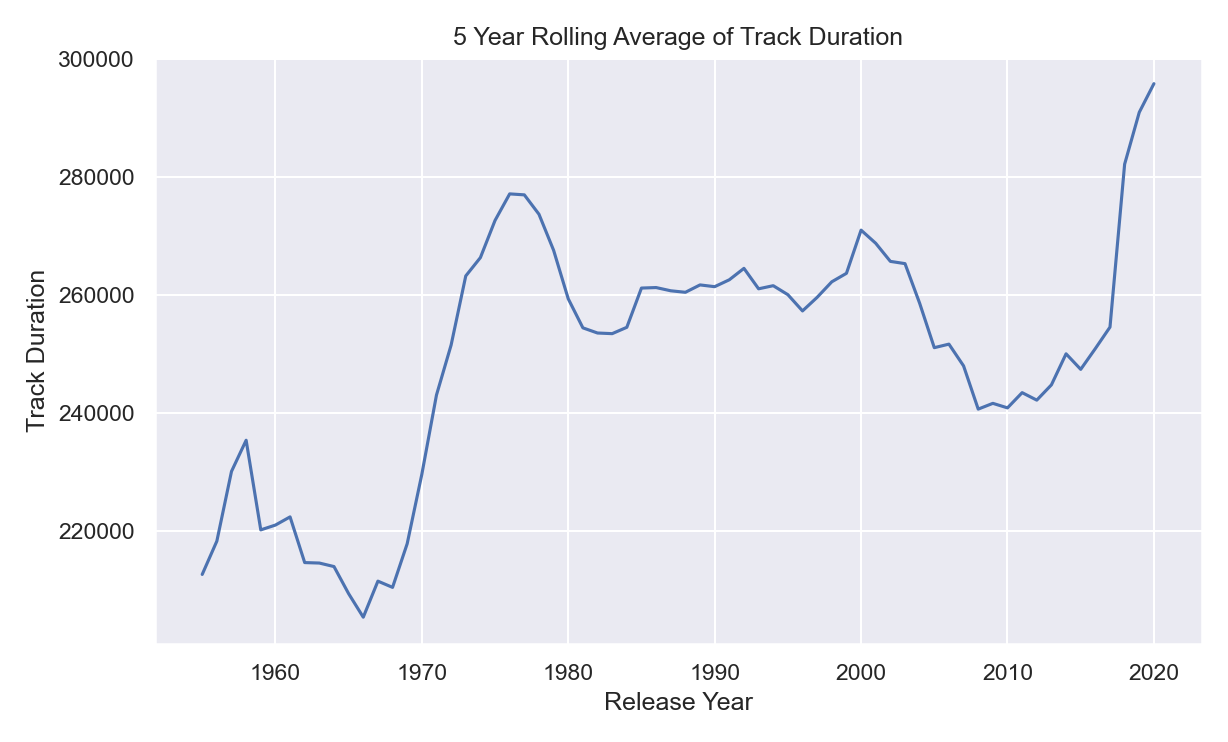

In [24]:
def ryear_sea(cols):
    fig, ax = plt.subplots(1, 1, tight_layout=True)
    sns.lineplot(data=releasedf[cols])
    ax.set_title(f"5 Year Rolling Average of {cols}")
    ax.set_ylabel(cols)
    ax.set_xlabel("Release Year")
    
ryear_sea("Track Duration")

In [12]:
# def releaseyear_line(col):
#     fig, ax = plt.subplots(1, 1, tight_layout=True)
#     ax.plot(trackdf.groupby("Release Year")[col].mean().index, trackdf.groupby("Release Year")[col].mean())
#     ax.set_title(f"Average {col} Over Time")
#     ax.set_ylabel(col)
#     ax.set_xlabel("Release Year")




<IPython.core.display.Javascript object>


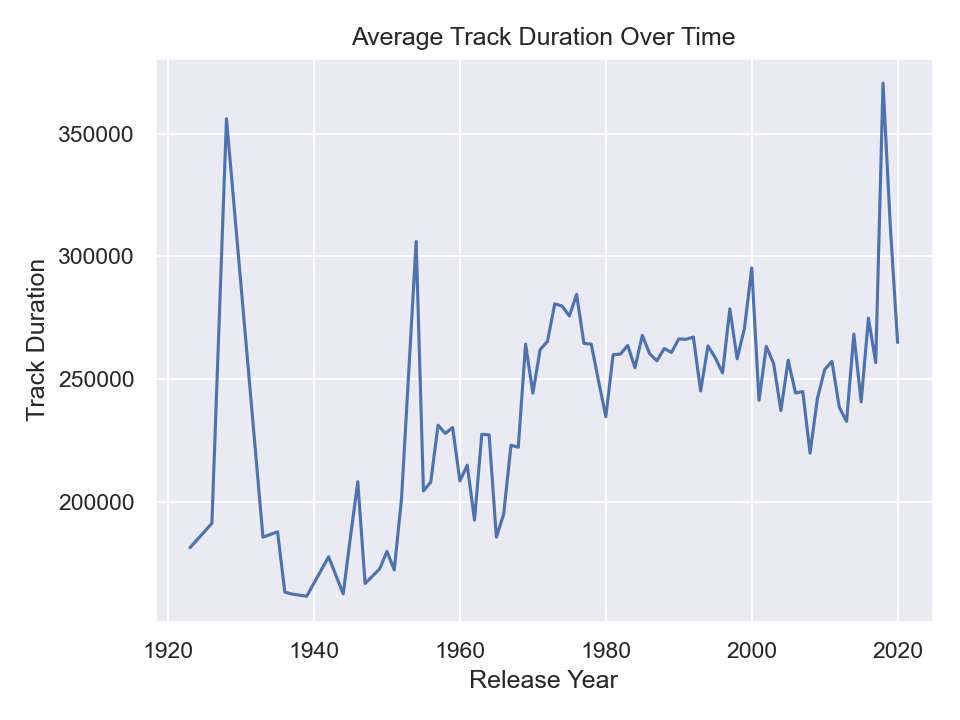

In [13]:
#releaseyear_line("Track Duration")

In [14]:
trackdf.loc[trackdf["Release Year"] == 2000].corr()["Popularity"]

Track Duration     -0.090792
Popularity          1.000000
Danceability        0.351183
Energy              0.127313
Key                 0.071017
Loudness            0.360679
Mode               -0.072378
Speechiness         0.055308
Acousticness       -0.225815
Instrumentalness   -0.386648
Liveness           -0.009541
Valence             0.145587
Tempo               0.036204
Release Year             NaN
Name: Popularity, dtype: float64

In [15]:

years = np.arange(1950, 2021, 1)
dur = []
dance = []
energy = []
loud = []
mode = []
speech = []
acoust = []
instrum = []
liven = []
vale = []
tempo = []

for year in years:
    corr_data = trackdf.loc[trackdf["Release Year"] == year].corr()["Popularity"]
    dur.append(corr_data[0])
    dance.append(corr_data[2])
    energy.append(corr_data[3])
    loud.append(corr_data[5])
    mode.append(corr_data[6])
    speech.append(corr_data[7])
    acoust.append(corr_data[8])
    instrum.append(corr_data[9])
    liven.append(corr_data[9])
    vale.append(corr_data[10])
    tempo.append(corr_data[11])
corr_df = pd.DataFrame({"Track Duration": dur,
                       "Danceability": dance,
                       "Energy": energy,
                       "Loudiness": loud,
                       "Mode": mode,
                       "Speechiness": speech,
                       "Acousticness": acoust,
                       "Instrumentalness": instrum,
                       "Liveness": liven,
                       "Valence": vale,
                       "Tempo": tempo},
                      index=years) 
corr_df = corr_df.rolling(5).mean()
corr_df = corr_df.dropna()
corr_df.tail()


,Track Duration,Danceability,Energy,Loudiness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
2016,0.064966,0.161060,0.100147,0.256507,-0.067446,0.041531,-0.200552,-0.188681,-0.188681,-0.079403,-0.060011
2017,0.006182,0.164200,0.075537,0.220884,-0.064443,0.061374,-0.158191,-0.169213,-0.169213,-0.065613,-0.060999
2018,0.005413,0.164318,0.077940,0.217453,-0.046066,0.079349,-0.115535,-0.193655,-0.193655,-0.050221,-0.084001
2019,-0.023402,0.170602,0.104696,0.210510,-0.061332,0.137295,-0.138142,-0.186923,-0.186923,-0.031665,-0.073941
2020,-0.069949,0.224881,0.160111,0.270368,-0.057123,0.205296,-0.194878,-0.195495,-0.195495,-0.007488,-0.024910


<IPython.core.display.Javascript object>


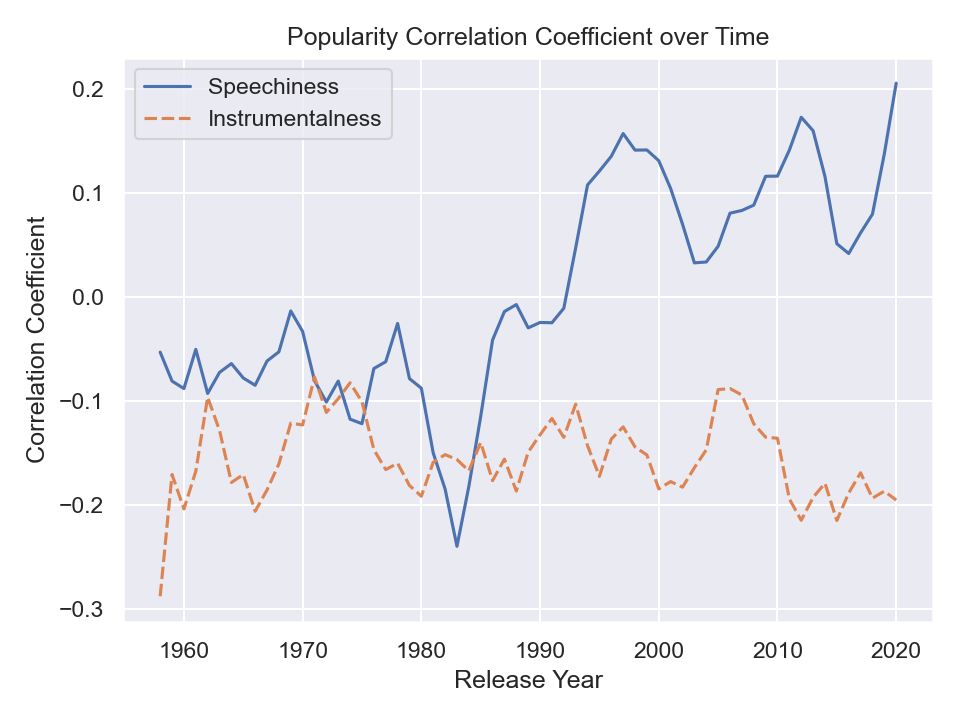

In [16]:
def correl_plot(cols):
    fig, ax = plt.subplots(1, 1, tight_layout=True)
    sns.lineplot(data=corr_df[cols])
    ax.set_title("Popularity Correlation Coefficient over Time")
    ax.set_xlabel("Release Year")
    ax.set_ylabel("Correlation Coefficient")
correl_plot(["Speechiness", "Instrumentalness"])
